# The Waze Rider
- In this project, I'm trying to build machine learning models based on Kaggle and SMFTA's data: I came up with WAZE Rider San Francisco Pilot to study features of a carpool modelling and make prdedictions that could help the business.
Waze is going the corporate route. Its Silicon Valley pilot is starting with more than 25,000 employees of select companies that schlep workers from city and the South Bay. 

Commute choice: dataset about carpool desicions, e.g., drive alone, car share, shuttle, uber, public transportation
Location: information about users location
Income: total income

In [138]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [103]:
df = pd.read_csv(os.path.join('..', 'FinalProject-GA', 'TDS_Data1.csv'))

## The Dataset

In [104]:
df

,RESP_NUM,Q2,Q3,TRIPS,Q4_TOTAL,...,ZONE,INTERVIEW_DAY,INTERVIEW_DATE,AGECO,WEIGHT
0,2.0,9,NaN,2,2.0,...,5.0,2,10/6/2014,1,1.043120
1,3.0,9,NaN,11,6.0,...,5.0,2,10/6/2014,2,1.115464
2,4.0,1,1.0,214,NaN,...,NaN,2,10/6/2014,7,1.048985
3,5.0,3,1.0,594,NaN,...,NaN,2,10/6/2014,10,0.930278
4,6.0,9,NaN,6,4.0,...,4.0,2,10/6/2014,4,0.870378
...,...,...,...,...,...,...,...,...,...,...,...
762,1920.0,9,NaN,6,4.0,...,5.0,1,11/9/2014,2,1.115464
763,1921.0,9,NaN,9,4.0,...,5.0,2,11/10/2014,3,0.865878
764,1922.0,9,NaN,5,5.0,...,5.0,2,11/10/2014,1,1.043120
765,1923.0,9,NaN,7,4.0,...,2.0,2,11/10/2014,3,0.865878


In [105]:
df.columns

Index([u'RESP_NUM', u'Q2', u'Q3', u'TRIPS', u'Q4_TOTAL', u'Q5_TOTAL', u'Q4AP',
       u'Q4BP', u'Q4CP', u'Q4DP',
       ...
       u'Q26-5', u'Q27', u'Q28', u'SAMPLE_TYPE', u'LANGUAGE', u'ZONE',
       u'INTERVIEW_DAY', u'INTERVIEW_DATE', u'AGECO', u'WEIGHT'],
      dtype='object', length=224)

In [106]:
print df.count()

RESP_NUM          767
Q2                767
Q3                392
TRIPS             767
Q4_TOTAL          375
                 ... 
ZONE              375
INTERVIEW_DAY     767
INTERVIEW_DATE    767
AGECO             767
WEIGHT            767
dtype: int64


## Cleaning the Data

In [107]:
##Remove columns
# Selecting only Home and Work - base on carpool purpose , Commute Way - Carpool
df.drop(['SCH', 'SHOP', 'SOC', 'OTH-P-SF', 'DK-P-SF','SHTTLE', 'BIKE', 'WALK', 'SCOOT', 'REL', 'OTH-M-SF', 'DK-M-SF', 
'SF-D1','INTERVIEW_DAY', 'INTERVIEW_DATE', 'LANGUAGE', 'Q4BP', 'Q4CP', 'Q4DP', 'Q4EP', 'Q4FP', 'Q4GP', 'Q4HP', 'Q5BP',
'Q5CP', 'Q5DP', 'Q5EP', 'Q5FP', 'Q5GP', 'Q5HP', 'Q18AP', 'Q18BP', 'Q18CP', 'Q18DP', 'Q18EP', 'Q18FP', 'Q18GP', 'Q18HP', 
'SCH1', 'SHOP1', 'SOC1', 'OTH1-P', 'DK1-P', 'SCH2', 'SHOP2', 'SOC2', 'OTH2-P', 'DK2-P', 'REL1', 'REL2', 'SHTTLE1', 'BIKE1',
'WALK1', 'SCOOT1', 'SHTTLE2', 'BIKE2', 'WALK2', 'SCOOT2', 'OTH1-M', 'OTH2-M', 'DK1-M', 'DK2-M', 'Q18AD', 'Q18BD', 'Q18CD', 
'Q18DD', 'Q18ED', 'Q18FD', 'Q18GD', 'Q18HD', 'OSF1-D1', 'OSF1-D3', 'OSF2-D1', 'OSF2-D3', 'Q22', 'Q26-1', 'Q26-2', 'Q26-3', 
'Q26-4', 'Q26-5', 'SAMPLE_TYPE', 'Q3', 'TRIPS', 'Q4_TOTAL', 'Q5_TOTAL', 'Q4AM', 'Q4BM', 'Q4CM', 'Q4DM', 'Q4EM', 'Q4FM', 
'Q4GM','Q4HM', 'Q5AM', 'Q5BM', 'Q5CM', 'Q5DM', 'Q5EM', 'Q5FM', 'Q5GM', 'Q5HM', 'Q4AD', 'Q4BD', 'Q4CD', 'Q4DD', 'Q4ED',
'Q4FD', 'Q4GD','Q4HD', 'Q5AD', 'Q5BD', 'Q5CD', 'Q5DD', 'Q5ED', 'Q5FD', 'Q5GD', 'Q5HD', 'Q8', 'Q11AP', 'Q11BP', 'Q11CP', 
'Q11DP','Q11EP', 'Q11FP', 'Q11GP', 'Q11HP', 'Q11AM', 'Q11BM', 'Q11CM', 'Q11DM','Q11EM', 'Q11FM', 'Q11GM',
'Q11HM', 'Q14M', 'Q16M-ADJ', 'Q18AM', 'Q18BM', 'Q18CM', 'Q18DM', 
'Q18EM', 'Q18FM', 'Q18GM', 'Q18HM', 'SF-D3'], axis = 1, inplace = True)

In [108]:
df = df.rename(columns={'Q27': 'Income'})
df = df.rename(columns={'RESP_NUM': 'RespondentNumber'})
df = df.rename(columns={'Q2': 'Location'})
df = df.rename(columns={'Q28': 'Gender'})

In [109]:
df.columns

Index([u'RespondentNumber', u'Location', u'Q4AP', u'Q5AP', u'WORK', u'HOME',
       u'SFINTMODE', u'DA', u'DO', u'CRSHRE', u'TNC', u'TAXI', u'TRANS',
       u'SF-D2', u'Q6', u'Q10', u'Q11_TOTAL', u'Q12', u'Q19', u'Q13', u'Q15',
       u'Q16M', u'Q17', u'Q18_TOTAL', u'Q9M', u'Q7P', u'9P-ADJ', u'Q14P',
       u'Q16P-ADJ', u'WORK1', u'WORK2', u'HOME1', u'HOME2', u'Q7M', u'Q9M-ADJ',
       u'DA1', u'DA2', u'DO1', u'DO2', u'CRSHRE1', u'CRSHRE2', u'TNC1',
       u'TNC2', u'TAXI1', u'TAXI2', u'TRANS1', u'TRANS2', u'Q7D', u'Q9D',
       u'Q11AD', u'Q11BD', u'Q11CD', u'Q11DD', u'Q11ED', u'Q11FD', u'Q11GD',
       u'Q11HD', u'Q14D', u'Q16D', u'OSF1-D2', u'OSF2-D2', u'OSF-D1',
       u'OSF-D2', u'OSF-D3', u'Q20A', u'Q21A', u'Q21B', u'Q21C', u'Q21D',
       u'Q23', u'Q24-SF', u'Q24-NSF', u'Q24A', u'Q25', u'Income', u'Gender',
       u'ZONE', u'AGECO', u'WEIGHT'],
      dtype='object')

In [ ]:
## Dropping additional columns 

In [117]:
df.drop(['Q4AP', 'Q5AP', 'SFINTMODE', 'Q6', 'Q10', 'Q11_TOTAL', 'Q12', 'Q19', 'Q15', 'Q16M',
'Q18_TOTAL', 'Q9M', 'Q7P', '9P-ADJ', 'Q14P', 'Q16P-ADJ', 'Q7M', 'Q9M-ADJ',
'Q7D', u'Q9D'], axis = 1, inplace = True)

In [118]:
df.columns

Index([u'RespondentNumber', u'Location', u'WORK', u'HOME', u'DA', u'DO',
       u'CRSHRE', u'TNC', u'TAXI', u'TRANS', u'SF-D2', u'Q13', u'Q17',
       u'WORK1', u'WORK2', u'HOME1', u'HOME2', u'DA1', u'DA2', u'DO1', u'DO2',
       u'CRSHRE1', u'CRSHRE2', u'TNC1', u'TNC2', u'TAXI1', u'TAXI2', u'TRANS1',
       u'TRANS2', u'Q11AD', u'Q11BD', u'Q11CD', u'Q11DD', u'Q11ED', u'Q11FD',
       u'Q11GD', u'Q11HD', u'Q14D', u'Q16D', u'OSF1-D2', u'OSF2-D2', u'OSF-D1',
       u'OSF-D2', u'OSF-D3', u'Q20A', u'Q21A', u'Q21B', u'Q21C', u'Q21D',
       u'Q23', u'Q24-SF', u'Q24-NSF', u'Q24A', u'Q25', u'Income', u'Gender',
       u'ZONE', u'AGECO', u'WEIGHT'],
      dtype='object')

In [120]:
df.Location.unique()

array([9, 1, 3, 8, 5, 2, 6, 7, 4])

Select 5-6-9 Location numbers meaning San Francisco and South Bay

In [125]:
subset_df = df[(df.Location == 5)]

subset_df.head()

,RespondentNumber,Location,WORK,HOME,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
12,16.0,5,NaN,NaN,NaN,...,3,2,NaN,7,1.048985
26,32.0,5,NaN,NaN,NaN,...,3,1,NaN,10,0.930278
48,59.0,5,NaN,NaN,NaN,...,4,2,NaN,7,1.048985
49,61.0,5,NaN,NaN,NaN,...,4,1,NaN,10,0.930278
52,64.0,5,NaN,NaN,NaN,...,5,2,NaN,7,1.048985


In [129]:
subset_df = df[(df.Location == 6)]

subset_df.head()

,RespondentNumber,Location,WORK,HOME,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
43,53.0,6,NaN,NaN,NaN,...,5,1,NaN,8,0.938616
63,76.0,6,NaN,NaN,NaN,...,5,1,NaN,7,1.048985
86,102.0,6,NaN,NaN,NaN,...,1,1,NaN,10,0.930278
88,104.0,6,NaN,NaN,NaN,...,1,2,NaN,10,0.930278
95,112.0,6,NaN,NaN,NaN,...,3,2,NaN,10,0.930278


In [128]:
subset_df = df[(df.Location == 9)]

subset_df.head()

,RespondentNumber,Location,WORK,HOME,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
0,2.0,9,0.0,1.0,0.0,...,1,1,5.0,1,1.043120
1,3.0,9,4.0,2.0,2.0,...,4,2,5.0,2,1.115464
4,6.0,9,0.0,2.0,0.0,...,4,1,4.0,4,0.870378
7,10.0,9,3.0,2.0,5.0,...,3,1,3.0,3,0.865878
9,12.0,9,0.0,1.0,1.0,...,1,1,5.0,3,0.865878


In [131]:
df.WORK.unique()

array([  0.,   4.,  nan,   3.,   2.,   1.,   8.,   5.])

In [133]:
df.WORK.value_counts()

0.0    192
2.0     76
1.0     68
3.0     23
4.0     14
8.0      1
5.0      1
Name: WORK, dtype: int64

In [134]:
df[ [df.columns.get_loc('WORK')] ]

,WORK
0,0.0
1,4.0
2,NaN
3,NaN
4,0.0
...,...
762,1.0
763,2.0
764,0.0
765,0.0


In [135]:
df[ (df.BuiltInYear < 1900) & (df.Size > 1500) ][ ['Address'] ]

AttributeError: 'DataFrame' object has no attribute 'BuiltInYear'

In [136]:
# Selecting Home and Work - base on carpool purpose 

HOME WORK DO CRSHRE SF-D2-  

SyntaxError: invalid syntax (<ipython-input-136-fb31204efafc>, line 3)

## Exploratory Data Analysis

In [137]:
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,RespondentNumber,Location,WORK,HOME,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
count,767.000000,767.000000,375.000000,375.000000,375.000000,...,767.000000,767.00000,375.000000,767.000000,767.000000
mean,887.331812,6.254237,0.954667,2.045333,1.514667,...,2.946545,1.46545,2.997333,5.946545,1.000000
std,592.725516,3.097085,1.212931,1.275257,2.241842,...,1.414587,0.49913,1.637624,2.927944,0.094487
min,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.00000,1.000000,1.000000,0.865878
25%,406.500000,3.000000,NaN,NaN,NaN,...,2.000000,1.00000,NaN,3.000000,0.930278
50%,815.000000,8.000000,NaN,NaN,NaN,...,3.000000,1.00000,NaN,6.000000,1.043120
75%,1426.500000,9.000000,NaN,NaN,NaN,...,4.000000,2.00000,NaN,9.000000,1.088087
max,1924.000000,9.000000,8.000000,8.000000,13.000000,...,5.000000,2.00000,9.000000,10.000000,1.135160


In [119]:
df.corr()

,RespondentNumber,Location,WORK,HOME,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
RespondentNumber,1.000000,0.016491,-0.065795,-0.032020,-0.034172,...,-0.024326,0.007275,0.029722,0.040759,-0.025486
Location,0.016491,1.000000,NaN,NaN,NaN,...,-0.101187,0.085496,NaN,-0.744379,-0.019309
WORK,-0.065795,NaN,1.000000,0.060105,0.217064,...,0.182311,-0.084247,-0.000061,-0.071567,-0.101878
HOME,-0.032020,NaN,0.060105,1.000000,0.300448,...,0.116378,-0.121089,-0.080602,-0.059011,-0.084258
DA,-0.034172,NaN,0.217064,0.300448,1.000000,...,0.185105,-0.102240,0.074661,0.031170,-0.078441
...,...,...,...,...,...,...,...,...,...,...,...
Income,-0.024326,-0.101187,0.182311,0.116378,0.185105,...,1.000000,-0.049768,-0.062830,0.198827,-0.151532
Gender,0.007275,0.085496,-0.084247,-0.121089,-0.102240,...,-0.049768,1.000000,0.050673,-0.077642,-0.053288
ZONE,0.029722,NaN,-0.000061,-0.080602,0.074661,...,-0.062830,0.050673,1.000000,-0.000846,0.015433
AGECO,0.040759,-0.744379,-0.071567,-0.059011,0.031170,...,0.198827,-0.077642,-0.000846,1.000000,-0.145661


### Recode all yes/no categorical variables with 0 as the most frequent value (then also append "_no" to the variable name), and 1 for the other

In [13]:
df.Q2.value_counts()

9    375
5    104
1     90
2     76
6     46
3     38
8     19
7     14
4      5
Name: Q2, dtype: int64

In [7]:
df[ [5, 6] ]

,Q5_TOTAL,Q4AP
0,0.0,3.0
1,5.0,1.0
2,NaN,NaN
3,NaN,NaN
4,2.0,4.0
...,...,...
762,2.0,4.0
763,5.0,4.0
764,0.0,4.0
765,3.0,4.0


In [8]:
type(df[ [5, 6] ])

pandas.core.frame.DataFrame

In [10]:
df[ ['RESP_NUM', 'Q2'] ]

,RESP_NUM,Q2
0,2.0,9
1,3.0,9
2,4.0,1
3,5.0,3
4,6.0,9
...,...,...
762,1920.0,9
763,1921.0,9
764,1922.0,9
765,1923.0,9


### Tidying up the Sale Price: Converting all numbers to dollars

In [5]:
Linear Regression- SF Salaries / Logit Regression - TDS -- Desicion Tree Random Forests

SyntaxError: invalid syntax (<ipython-input-5-d3624b0d5898>, line 1)

In [8]:
X = df[ ['Q4_TOTAL', 'Q2', 'Q3', 'TRIPS'] ]

In [6]:
ys = pd.get_dummies(df.Q4_TOTAL, prefix = None)

In [7]:
ys

,0.0,1.0,2.0,3.0,4.0,...,6.0,7.0,8.0,10.0,15.0
0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
762,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
763,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
765,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0


In [13]:
model_Zone = linear_model.LogisticRegression()

model_Zone.fit(X, ys.Q4_TOTAL)

print model_Zone.coef_
print model_Zone.intercept_

AttributeError: 'DataFrame' object has no attribute 'Q4_TOTAL'

In [ ]:
level_2 = ((df.Q4_TOTAL > df.Q4_TOTAL.quantile(.2)) & (df.Q4_TOTAL <= df.Q4_TOTAL.quantile(.5)))
level_3 = ((df.Q4_TOTAL > df.Q4_TOTAL.quantile(.5)) & (df.Q4_TOTAL <= df.Q4_TOTAL.quantile(.8)))
level_4 = (df.Q4_TOTAL > df.Q4_TOTAL.quantile(.8))

df['Q4_TOTAL_Category'] = '1'
df.loc[level_2, 'Q4_TOTAL_Category'] = '2'
df.loc[level_3, 'Q4_TOTAL_Category'] = '3'
df.loc[level_4, 'Q4_TOTAL_Category'] = '4'

In [27]:
color = df.Q4_TOTAL.map(pd.Series({'2.0': 'red', '4.0': 'green', '6.0': 'blue'}))

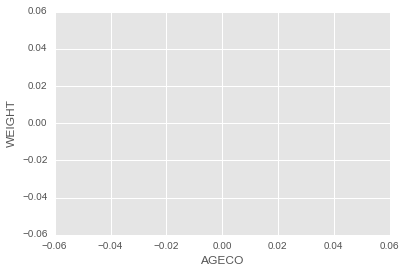

In [28]:
df.plot('AGECO', 'WEIGHT', kind = 'scatter', c = color)